In [45]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

a couple of cells to check the plot drawings, later a function will do the plotting in a systematic manner. 

In [46]:
base_path = '/Users/bordonis/ResearchActivities/Perovskite/ellipsometry/'
file_path_cs = os.path.join(base_path,'PSI_cs021-65.dat')
with open(file_path_cs) as f:
    lines = f.readlines()
    x_cs = [float(line.split()[0]) for line in lines]
    y_cs = [float(line.split()[1]) for line in lines] 


In [47]:
mylambda = [(a * 10**-7)**-1 for a in x_cs]

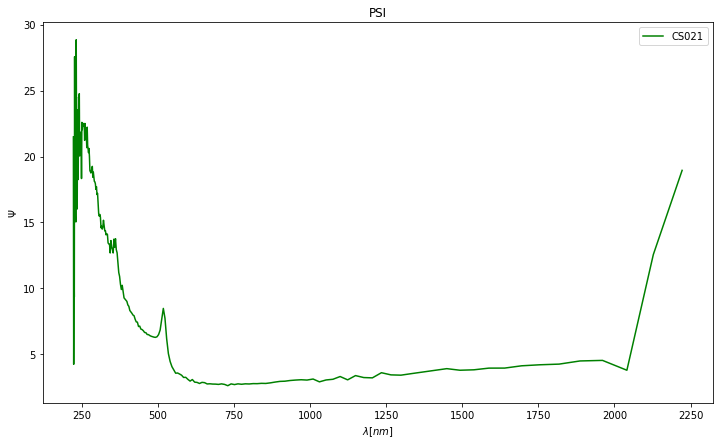

In [48]:
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(111)
ax1.set_title("PSI")    
ax1.set_xlabel('$\lambda [nm]$')
ax1.set_ylabel('$\Psi$')
#plt.plot(mylambda ,y, label='BR300', c='b')
plt.plot(mylambda ,y_cs, label='CS021', c='g')
plt.legend()
plt.show()

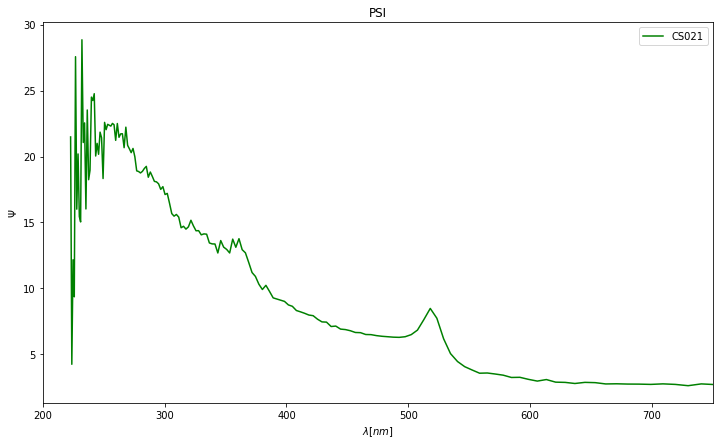

In [49]:
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(111)
ax1.set_title("PSI")    
ax1.set_xlabel('$\lambda [nm]$')
ax1.set_ylabel('$\Psi$')
#plt.plot(mylambda ,y, label='BR300', c='b')
plt.plot(mylambda ,y_cs, label='CS021', c='g')
plt.legend()
plt.xlim(200, 750)
plt.show()

Here I define a function which read the files from the two crystals and draw the superposed plot: 
- on the left there is the entire wavelenght range
- on the right I cut on the lower side at 250nm to avoid some big fluctuations sometime visible and then just up to the visible 

In [56]:
base_path = '/Users/bordonis/ResearchActivities/Perovskite/ellipsometry/'

def plot_ellipso(obs, label, xmin = 245, xmax= -99):
    
    datafile_cs = obs+'_cs021-65.dat'
    file_path_cs = os.path.join(base_path,datafile_cs)
    print('opening file : ', file_path_cs)
    with open(file_path_cs) as f_cs:
        lines = f_cs.readlines()
        x_cs = [float(line.split()[0]) for line in lines]
        y_cs = [float(line.split()[1]) for line in lines] 

    
    datafile_bro = obs+'_bro300-65.dat'
    file_path_bro = os.path.join(base_path,datafile_bro)
    print('opening file : ', file_path_bro)
    with open(file_path_bro) as f_bro:
        lines = f_bro.readlines()
        x_bro = [float(line.split()[0]) for line in lines]
        y_bro = [float(line.split()[1]) for line in lines] 

    mylambda = [(a * 10**-7)**-1 for a in x_cs]

    print('drawing plot for ', obs)

    fig = plt.figure(figsize=(30,10))
    ax1 = fig.add_subplot(121)
    #ax1.set_title(obs, fontsize=20)    
    ax1.set_xlabel('$\lambda [nm]$', fontsize=20)
    ax1.tick_params(axis='x',  labelsize=20)
    yaxislabel='$\\' +label+'$'
    ax1.set_ylabel(yaxislabel, fontsize=20)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.plot(mylambda ,y_bro, label='BR300', c='b')
    ax1.plot(mylambda ,y_cs, label='CS021', c='g')
    ax1.legend(fontsize="20", frameon=False)
    
    #h = 4.13e-15
    #c = 3.0e8
    #myE = [(c*h)/( _lambda*1e-9) for _lambda in mylambda] 
    
    #ax4 = ax1.twiny()
    #ax4.tick_params(axis='x',  labelsize=20)
    #ax4.set_xlabel('$E [eV]$', fontsize=20)
    #ax4.plot(myE,y_cs, label='CS021', c='g')
    

    ax2 = fig.add_subplot(122)
    #ax2.set_title(obs, fontsize=20)    
    ax2.set_xlabel('$\lambda [nm]$', fontsize=20)
    ax2.tick_params(axis='x',  labelsize=20)
    yaxislabel='$\\' +label+'$'
    ax2.set_ylabel(yaxislabel, c='g', fontsize=20)
    #ax2.plot(mylambda ,y_bro, label='BR300', c='b')
    ax2.plot(mylambda ,y_cs, label='CS021', c='g')
    ax2.tick_params(axis='y', labelcolor='g',  labelsize=20)
    ax2.set_xlim(245, 750)
    ax3 = ax2.twinx()  
    ax3.plot(mylambda ,y_bro, label='BR300', c='b')
    ax3.tick_params(axis='y', labelcolor='b',  labelsize=20)
    ax3.set_ylabel(yaxislabel, c='b', fontsize=20)
    #fig.legend(['CS021','BR300'],fontsize="20",frameon=False)
    ax2.plot(np.nan, '-b', label = 'BR300')
    ax2.legend(loc=0, fontsize="20", frameon=False)    
    fig.tight_layout()
    #plt.show()
   
    #ax5 = ax2.twiny()
    #ax5.tick_params(axis='x',  labelsize=20)
    #ax5.set_xlabel('$E [eV]$', fontsize=20)
    #ax5.plot(myE,y_cs, label='CS021', c='g')

   
    
    print('saving plot as: ',base_path+obs+'.pdf')
    plt.savefig(base_path+obs+'.pdf')


opening file :  /Users/bordonis/ResearchActivities/Perovskite/ellipsometry/PSI_cs021-65.dat
opening file :  /Users/bordonis/ResearchActivities/Perovskite/ellipsometry/PSI_bro300-65.dat
drawing plot for  PSI
saving plot as:  /Users/bordonis/ResearchActivities/Perovskite/ellipsometry/PSI.pdf


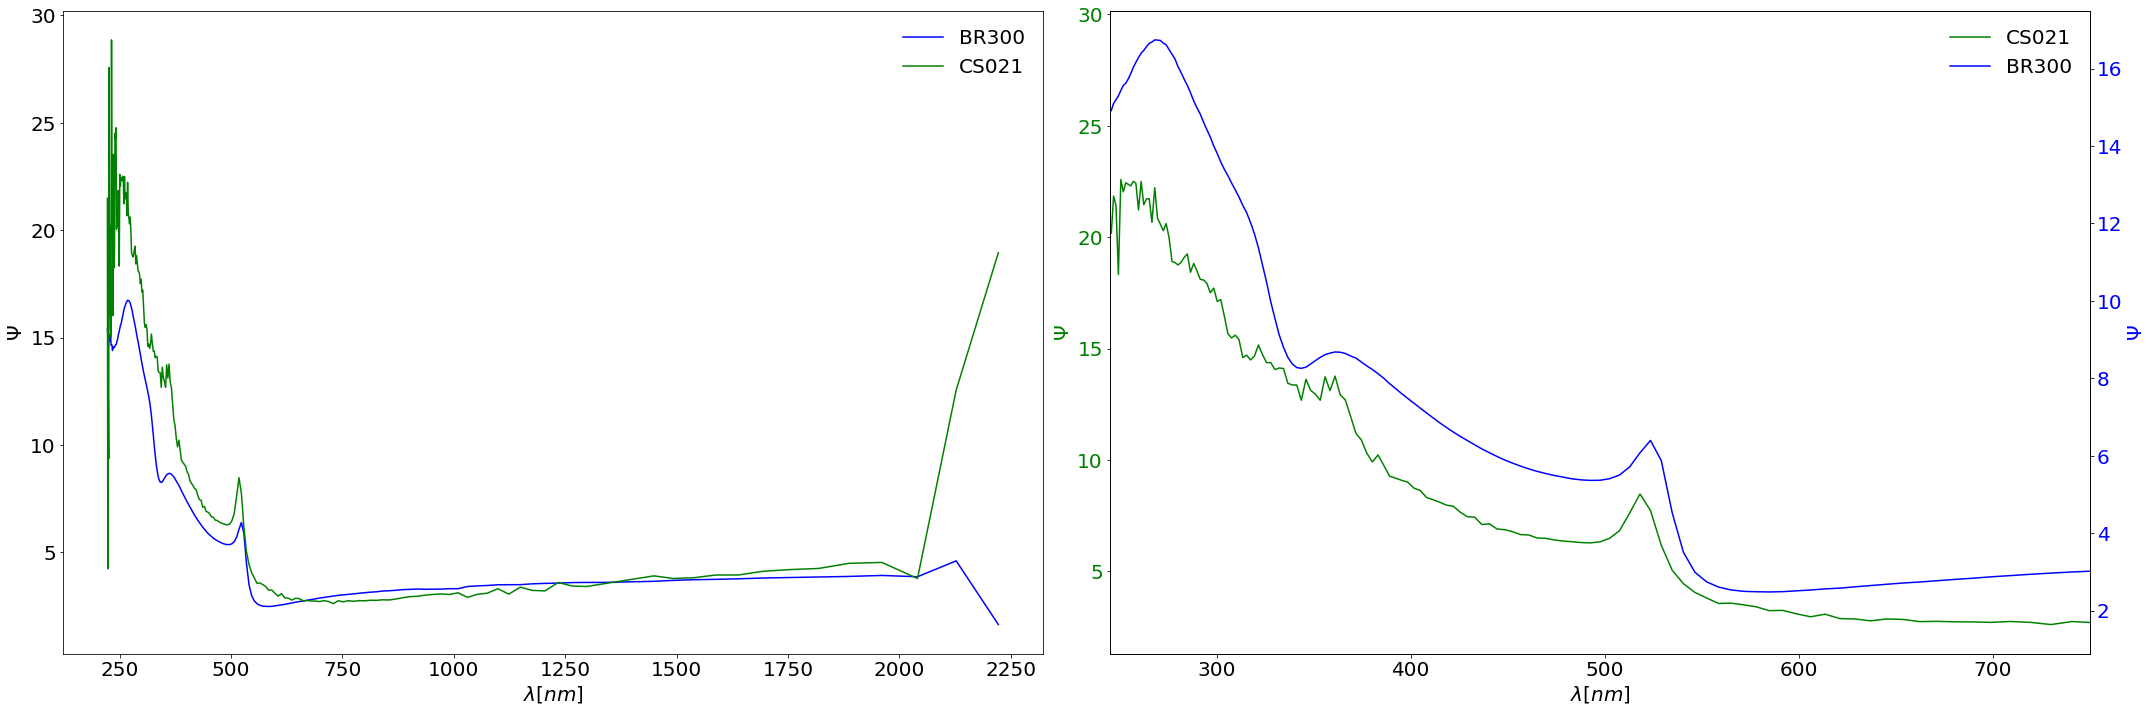

In [57]:
plot_ellipso('PSI', 'Psi'  )

In [ ]:
plot_ellipso('DELTA', 'Delta'  )

In [ ]:
plot_ellipso('e1', 'epsilon1'  )

In [ ]:
plot_ellipso('e2', 'epsilon2'  )

In [ ]:
plot_ellipso('s1', 'sigma1'  )

In [58]:
base_path = '/Users/bordonis/ResearchActivities/Perovskite/ellipsometry/'

def plot_ellipso_3col(obs, label, xmin = -99, xmax=-99 ):
    
    datafile_cs = obs+'_cs021-65.dat'
    file_path_cs = os.path.join(base_path,datafile_cs)
    print('opening file : ', file_path_cs)
    with open(file_path_cs) as f:
        lines = f.readlines()
        x_cs = [float(line.split()[0]) for line in lines]
        y1_cs = [float(line.split()[1]) for line in lines] 
        y2_cs = [float(line.split()[2]) for line in lines] 

    
    datafile_bro = obs+'_bro300-65.dat'
    file_path_bro = os.path.join(base_path,datafile_bro)
    print('opening file : ', file_path_bro)
    with open(file_path_bro) as f:
        lines = f.readlines()
        x_bro = [float(line.split()[0]) for line in lines]
        y1_bro = [float(line.split()[1]) for line in lines] 
        y2_bro = [float(line.split()[2]) for line in lines] 

    
    mylambda = [(a * 10**-7)**-1 for a in x_cs]

    print('drawing plot for ', obs)

    fig = plt.figure(figsize=(30,7))
    ax1 = fig.add_subplot(121)
    #ax1.set_title(obs, fontsize=20)    
    ax1.set_xlabel('$\lambda [nm]$', fontsize=20)
    ax1.tick_params(axis='x',  labelsize=20)
    #yaxislabel='$\\' +label+'$'
    yaxislabel=label
    ax1.set_ylabel(yaxislabel, fontsize=20)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.plot(mylambda ,y1_bro, label='n BR300', c='b')
    ax1.plot(mylambda ,y2_bro, label='k BR300', c='b', ls='--')
    ax1.plot(mylambda ,y1_cs, label='n CS021', c='g')
    ax1.plot(mylambda ,y2_cs, label='k CS021', c='g', ls='--')
    ax1.legend(fontsize="20", frameon=False)
    plt.savefig(base_path+obs+'.pdf')
    

opening file :  /Users/bordonis/ResearchActivities/Perovskite/ellipsometry/n_cs021-65.dat
opening file :  /Users/bordonis/ResearchActivities/Perovskite/ellipsometry/n_bro300-65.dat
drawing plot for  n


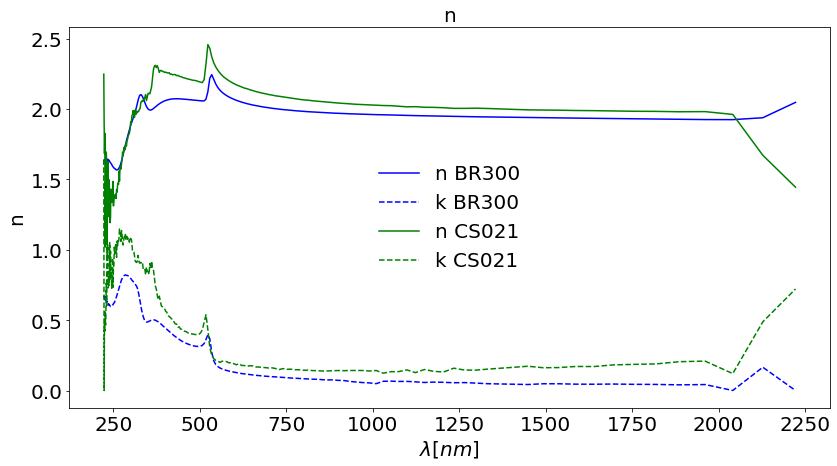

In [59]:
plot_ellipso_3col('n', 'n'  )

In [ ]:
plot_ellipso_3col('R', 'R'  )